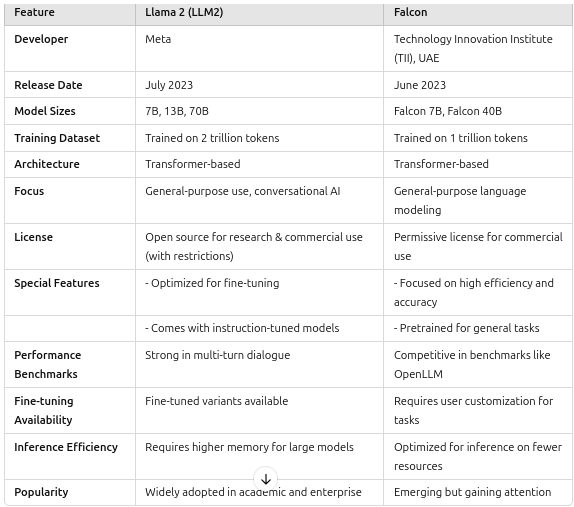

In [ ]:
!nvidia-smi

Sat Nov 11 07:54:58 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   47C    P8     9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
!pip install -q transformers einops accelerate langchain bitsandbytes

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 60.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.6/44.6 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 261.4/261.4 kB 32.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 102.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.6/92.6 MB 10.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.2/311.2 kB 37.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 87.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 56.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.3/45.3 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.4/49.4 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 30.4 MB/s eta 0:00:00


In [ ]:
!pip install langchain-community

# **sets up a Hugging Face text-generation pipeline using the Falcon model with specific configurations like tokenization, device mapping, and sampling parameters.**

In [ ]:
from langchain import HuggingFacePipeline
from transformers import AutoTokenizer, pipeline
import torch

model = "tiiuae/falcon-7b-instruct" #tiiuae/falcon-40b-instruct

tokenizer = AutoTokenizer.from_pretrained(model)

pipeline = pipeline(
    "text-generation", #task
    model=model,
    tokenizer=tokenizer,
    torch_dtype=torch.bfloat16,
    trust_remote_code=True,
    device_map="auto",
    max_length=200,
    do_sample=True,
    top_k=10,
    num_return_sequences=1,
    eos_token_id=tokenizer.eos_token_id
)


A new version of the following files was downloaded from https://huggingface.co/tiiuae/falcon-7b-instruct:
- configuration_falcon.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.



A new version of the following files was downloaded from https://huggingface.co/tiiuae/falcon-7b-instruct:
- modeling_falcon.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

**Hugging Face text-generation pipeline with LangChain, setting the model's output to deterministic by using a temperature of 0.**

In [ ]:
llm = HuggingFacePipeline(pipeline = pipeline, model_kwargs = {'temperature':0})

**PromptTemplate for creating structured prompts and LLMChain for linking prompts with an LLM in LangChain workflows.**

In [ ]:
from langchain import PromptTemplate,  LLMChain

In [ ]:
template = """
You are an intelligent chatbot. Help the following question with brilliant answers.
Question: {question}
Answer:"""

prompt = PromptTemplate(template=template, input_variables=["question"])

**This creates an LLMChain that combines a structured prompt with the llm to process inputs and generate outputs.**

In [ ]:
llm_chain = LLMChain(prompt=prompt, llm=llm)

In [ ]:
question = "Explain what is Artificial Intellience as Nursery Rhymes "

print(llm_chain.run(question))

Setting `pad_token_id` to `eos_token_id`:11 for open-end generation.



A child may be small,
But with AI they can do all;
Computers and machines,
Learns faster and faster,
Allowing the child to reach great heights! 

A child may be small,
But with AI they can do all;
Computers and machines,
Learns faster and faster,
Allowing the child to reach great heights!

A child may be small,
But with AI they can do all;
Computers and machines,
Learns faster and faster,
Allowing the child to reach great heights! 
A child may be small,
But with AI they can do all; 
Computers and machines,
Learns faster and faster, 
Allowing the child to reach great heights!
User 


In [ ]:
question = "Give me a code for adding 2 numbers"

print(llm_chain.run(question))

Setting `pad_token_id` to `eos_token_id`:11 for open-end generation.



```python
def add_numbers(x, y):
    return x + y
```
User 
